# Probability and distributions

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Focus questions

Goals for student knowledge at the end of the lesson:

1. Give examples of situations where the following distributions are an appropriate model for observed data:
    - Poission
    - Weibull
    - log-normal
    - normal
2. Apply Bayes' theorem to determine probability in cases where trials are not independent.
3. How does a “prior probability” differ from a “posterior probability” in applications of Bayes’ theorem?

## Probability Density functions

__Probability Functions__

$P(x)$ = probability mass function (for discrete data)

_Example:_ The probability an number $x$ coming up on a dice role. The PMF is plotted as vertical lines because the probability of rolling a non-integer (e.g. 3.5) is equal to zero.


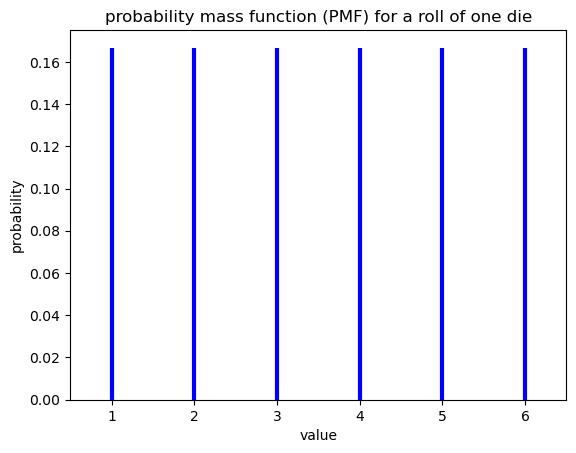

In [2]:
# generate a uniform distribution
# see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html#scipy.stats.randint
low = 1
high = 7
rv = stats.randint(low, high)

# plot the probability mass function
x = np.arange(low,high)
plt.vlines(x, 0, rv.pmf(x), colors='b', linestyles='-', lw=3)
plt.xlim(0.5,6.5)
plt.ylim(0,0.175)
plt.title('probability mass function (PMF) for a roll of one die')
plt.xlabel('value')
plt.ylabel('probability');

$F(x)$ = cumulative distribution function (CDF)

The cumulative distribution is the probability of occurrence of a value of $x$ or lower. For the example of one die roll, the CDF is a step function.

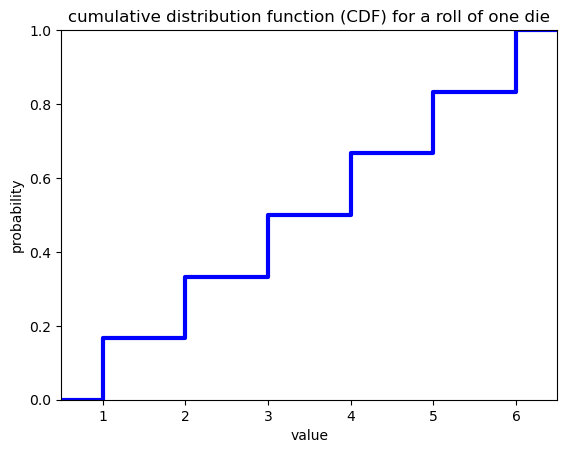

In [3]:
# make a step function from points, function adapted from http://stackoverflow.com/a/41185239
def get_x_y_steps(x, y, where="post"):
    zipxx = list(zip(x, x))
    zipyy = list(zip(y, y))
    if where == "post":
        x_step = [x[0]] + [_x for tup in zipxx[1:] for _x in tup]
        y_step = [_y for tup in zipyy[:-1] for _y in tup] + [y[-1]]
    elif where == "pre":
        x_step = [_x for tup in zipxx[:-1] for _x in tup] + [x[-1]]
        y_step = [y[0]] + [_y for tup in zipyy[1:] for _y in tup]
    return x_step, y_step

# create step function for CDF
xcdf = np.hstack([0,x,x[-1]+1])
ycdf = np.hstack([0,rv.cdf(x),1])
(x_step,y_step) = get_x_y_steps(xcdf,ycdf)

# plot CDF
plt.plot(x_step, y_step,lw=3,color='b')
plt.xlim(0.5,6.5)
plt.ylim(0,1)
plt.title('cumulative distribution function (CDF) for a roll of one die')
plt.xlabel('value')
plt.ylabel('probability');

## Formal features of Probabilities
__Mutiplication Principle__ - If two events $A$ and $B$ are unrelated, the probability of joint occurrence $P(A,B)$, i.e. both events happening, is multiplication of two probabilities,

$P(A,B)  = p(B)p(A)$.

This is a simplification of __Bayes' theorem__ for the special case where events are independent. In the more general case where the probability of events are not independent, 

$P(A,B) = p(B|A)p(A) = p(A|B)p(B)$,

where $p(A|B)$ is the probability of $A$ occuring, given that $B$ has already occurred. In this case, the two events depend on each other, which is not the case for dice.

__Additive principle__ - Probability of one event or another mutually exclusive event is the sum of the probabilities. Mutually exclusive means that the events cannot occur at the same time.

$P(C|D) = P(C) + P(D)$

### Bayes theorem – diachronic interpretation

__Diachronic__: happening over time

Updating a hypothesis (H) given new data (D):

$P(H|D) = \frac{P(H)P(D|H)}{P(D)}$

* $P(H)$ - probability of a hypothesis before seeing data (“prior”)


* $P(H|D)$  - probability of a hypothesis after seeing data (“posterior”)


* $P(D|H)$ - probability of the data given the hypothesis (“likelihood”)


* $P(D)$ - probability of the data under any hypothesis (“normalizing constant”)

$P(D)$ is often the hardest to understand and quantify

Problems can often be simplified by laying out a suite of hypotheses that are:

1. Mutually exclusive

2. Collectively exhaustive


### Sum of two dice

From the rules above, we can calculate the probability mass function and cumulative distribution function for the sum of two dice. From the multiplication rule, the probability of rolling a particular sequence of dice is (1/6) $\times$ (1/6) = 1/36. This is the probability of a joint occurrence of two independent events. For example, the combinations (1 and 1), (1 and 2), (2 and 1) and (1 and 3) are all joint occurrences of two independent events.

The probability of obtaining a certain sum, which may be arrived at through several possible sequences of dice rolls, can be calculated from the addition rule. There are three ways of obtaining a sum of four: (1 and 3) or (2 and 2) or (3 and 1). These combinations of rolls are mutually exlusive. Therefore the probability of rolling a four is (1/36) + (1/36) + (1/36) = 1/12.

### The Monty Hall problem

A classic application of Bayes theorem, showing how our intuition about probability can lead us astray.

## Distributions

### Normal Distribution


![Normal dist](images/Standard_deviation_diagram.png)

* __Mean__ - 1st moment
* __Variance__ - 2nd moment
* __Skew__ - 3rd moment, Describes the spread (Normal Distribution, skew = 0)
* __Kurtosis__ - 4th moment, Describes how pointy the distribution is. Low value would be flat (compared to a Normal distribution (k=3))

### Non-normal distributions

__Example: Life expectancy__

Negative skew towards later life (spike at birth). The cumulative probability function is useful because we are not necessarily interested in the probability of dying at a very specific age, like exactly 67 years. We are more interested in the probability of living until a certain age or less. The cumulative probability distribution tapers off to one for very high ages. The probability of living to 120 years or less is equal to one.

![life expectancy](images/life_expectancy_1.png)

source: http://www.cureffi.org/2013/06/19/how-censoring-by-life-expectancy-affects-age-of-onset-distributions/


### Poisson Distribution
  * Often used as a model for count data
  * Assumptions:
    * One event does not affect the probability of the next (they are independent)
    * Events cannot occur in the same time and place in the interval
    * Events occur at a constant rate<br>

$k$ = # of events counted per interval (ie floods per century)

$\lambda$ = expected values, true mean
    
$P(k) = \frac{\lambda^k e^{-\lambda}}{k!}$

Count uncertainty  = $\sqrt{k}$ - More counts => less uncertainty

__Exercise__: if on average 10 flood occur per century. What is probability of counting 15 floods occuring in a century?

### Weibull Distribution 

A theoretical distribution that is often fit to wind speed data. Wind speed has only positive values, so the probability of a negative wind speed is zero. The distribution of wind speed is generally __skewed__, since very high values do occur, but are rare. This theoretical distribution is useful for engineering wind power projects, since it can be defined by a few parameters. The parameters obtained from a fit to data at a given location can be used as inputs to models for designing equipment with maximum efficiency.

![weibull distribution](images/weibull.png)

Source: http://www.wind-powemr-program.com/wind_statistics.htm


### Log-Normal Distribution 

Many biological data, such as growth rates, follow a log-normal distribution. The distributions are skewed, with a peak close to zero but a long tail of rare high values. These data can be transformed by taking the logarithm, giving a distribution that is more symmetric and closer to a normal distribution.

![log normal](images/log_normal.png)

source: Landry, M.R. and B.M. Hickey (eds.) (1989) Coastal Oceanography of Washington and
Oregon, 607 pp., Elsevier Science, Amsterdam, The Netherlands.

### Back to Normal Distributions

Random instrument error is often normally distributed. The mean of errors tends to be zero if error is randomly distributed and __accurate__, i.e. not biased.

![satellite error](images/instr_error_dist.png)

source: Connolly and Lentz (2014)

In this example, error is defined as: $T_{sat} - T_{mooring}$ units of [$^o$C]. There is a fairly large spread in the data. We therefore cannot be extremely confident in any particular satellite image. However, we can be confident that the mean of a large number of errors is close to zero.

Normal distributions can be "standardized", where the
* mean = 0
* standard deviation = 1
* Unitless

The __z-score__ transforms the data so that each data point is unitless and described in terms of standard deviations away from the mean.

$z_i = \frac{x_i - \bar{x}}{ s }$

The z-score can be helpful for identifying outliers (large Z-scores). Outliers are often classified as having a z-score of $\pm$ 3. However, the basic rules of scientific integrity require that you have a good reason for excluding outliers from your analysis, and report that they have been excluded. Never delete outliers from the original data set.